In [ ]:
import pandas as pd

data_movie = pd.read_csv('/content/drive/MyDrive/For Python/Netflix_Dataset_Movie.csv')
data_rating = pd.read_csv('/content/drive/MyDrive/For Python/Netflix_Dataset_Rating.csv')

In [ ]:
data_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Movie_ID  17770 non-null  int64 
 1   Year      17770 non-null  int64 
 2   Name      17770 non-null  object
dtypes: int64(2), object(1)
memory usage: 416.6+ KB


In [ ]:
data_movie

,Movie_ID,Year,Name
0,1,2003,Dinosaur Planet
1,2,2004,Isle of Man TT 2004 Review
2,3,1997,Character
3,4,1994,Paula Abdul's Get Up & Dance
4,5,2004,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004,Fidel Castro: American Experience
17767,17768,2000,Epoch
17768,17769,2003,The Company


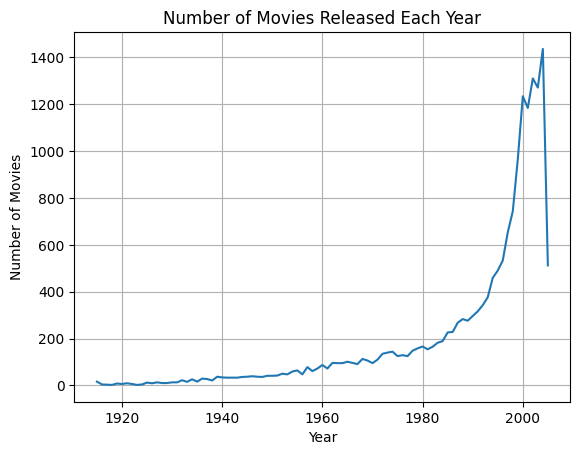

In [ ]:
import matplotlib.pyplot as plt

movie_per_year = data_movie.groupby(['Year']).count().reset_index()

plt.grid(True)
plt.plot(movie_per_year['Year'], movie_per_year['Movie_ID'])

plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

plt.show()

In [ ]:
data_rating

,User_ID,Rating,Movie_ID
0,712664,5,3
1,1331154,4,3
2,2632461,3,3
3,44937,5,3
4,656399,4,3
...,...,...,...
17337453,520675,3,4496
17337454,1055714,5,4496
17337455,2643029,4,4496
17337456,1559566,3,4496


In [ ]:
print(data_rating['User_ID'].nunique())
print(data_rating['Movie_ID'].nunique())

143458
1350


In [ ]:
df_both = pd.merge(data_rating, data_movie, on='Movie_ID', how='inner')
df_both

,User_ID,Rating,Movie_ID,Year,Name
0,712664,5,3,1997,Character
1,1331154,4,3,1997,Character
2,2632461,3,3,1997,Character
3,44937,5,3,1997,Character
4,656399,4,3,1997,Character
...,...,...,...,...,...
17337453,520675,3,4496,1993,Farewell My Concubine
17337454,1055714,5,4496,1993,Farewell My Concubine
17337455,2643029,4,4496,1993,Farewell My Concubine
17337456,1559566,3,4496,1993,Farewell My Concubine


In [ ]:
df_both.isna().sum()

User_ID     0
Rating      0
Movie_ID    0
Year        0
Name        0
dtype: int64

In [ ]:
df_rating = df_both.drop('Year', axis = 1)
df_rating

,User_ID,Rating,Movie_ID,Name
0,712664,5,3,Character
1,1331154,4,3,Character
2,2632461,3,3,Character
3,44937,5,3,Character
4,656399,4,3,Character
...,...,...,...,...
17337453,520675,3,4496,Farewell My Concubine
17337454,1055714,5,4496,Farewell My Concubine
17337455,2643029,4,4496,Farewell My Concubine
17337456,1559566,3,4496,Farewell My Concubine


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder_users = LabelEncoder()
encoder_movies = LabelEncoder()

df_rating['encoded_users'] = encoder_users.fit_transform(df_rating['User_ID'].values)
df_rating['encoded_movies'] = encoder_movies.fit_transform(df_rating['Movie_ID'].values)

In [ ]:
df_rating

,User_ID,Rating,Movie_ID,Name,encoded_users,encoded_movies
0,712664,5,3,Character,38885,0
1,1331154,4,3,Character,72494,0
2,2632461,3,3,Character,142536,0
3,44937,5,3,Character,2467,0
4,656399,4,3,Character,35784,0
...,...,...,...,...,...,...
17337453,520675,3,4496,Farewell My Concubine,28500,1349
17337454,1055714,5,4496,Farewell My Concubine,57568,1349
17337455,2643029,4,4496,Farewell My Concubine,143100,1349
17337456,1559566,3,4496,Farewell My Concubine,84781,1349


In [ ]:
pivot_df = df_rating.pivot(index='encoded_users', columns='encoded_movies', values='Rating')
pivot_df

encoded_movies,0,1,2,3,4,5,6,7,8,9,...,1340,1341,1342,1343,1344,1345,1346,1347,1348,1349
encoded_users,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,5.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,...,3.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143454,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,3.0,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN


In [ ]:
from scipy.sparse.linalg import svds
import scipy.sparse as sp

avg_rating = pivot_df.mean(axis = 1)
pivot_centered = pivot_df.sub(avg_rating, axis = 0).fillna(0)

U, sigma, V = svds(sp.csr_matrix(pivot_centered), k = 32)

sigma = np.diag(sigma)

matrix_rating = np.dot(np.dot(U, sigma), V)

matrix_rating = matrix_rating + avg_rating.values.reshape(-1,1)

In [ ]:
recom_df = pd.DataFrame(matrix_rating, columns= pivot_df.columns, index = pivot_df.index)
recom_df

encoded_movies,0,1,2,3,4,5,6,7,8,9,...,1340,1341,1342,1343,1344,1345,1346,1347,1348,1349
encoded_users,,,,,,,,,,,,,,,,,,,,,
0,3.353386,3.331845,3.368404,3.305997,3.350086,3.310041,3.380056,3.499090,3.380576,3.365812,...,3.071886,3.361155,3.354144,3.242586,3.351936,3.322811,3.353486,3.256865,3.342525,3.328375
1,4.077675,4.051070,4.062179,4.057332,4.124309,4.058421,4.022173,4.314300,4.105490,4.053615,...,3.597982,4.060437,4.069544,4.248245,4.064651,4.145299,4.062380,4.089940,4.062688,4.108443
2,3.501451,3.413049,3.507013,3.394233,3.522659,3.401830,3.692146,3.831244,3.543478,3.428223,...,3.409732,3.514197,3.500468,3.581732,3.508735,3.237979,3.391020,3.359561,3.475249,3.508994
3,3.233931,3.260734,3.242646,3.243356,3.290331,3.250389,3.184371,3.874381,3.241834,3.193983,...,3.206862,3.223844,3.231242,3.416467,3.223345,3.191633,3.192245,3.255438,3.217155,3.262579
4,4.748346,4.740589,4.738126,4.719169,4.745719,4.721858,4.826400,4.515132,4.758293,4.720747,...,4.590317,4.737222,4.748613,4.743436,4.743307,4.739832,4.728199,4.727297,4.737529,4.754200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143453,3.868435,3.850950,3.876202,3.849079,3.880356,3.835741,3.862106,3.884735,3.880459,3.883167,...,3.642292,3.873425,3.860681,3.833740,3.866842,3.815267,3.863155,3.801312,3.858641,3.856842
143454,3.183356,3.160748,3.190526,3.174195,3.189510,3.180357,3.180306,3.349890,3.192195,3.158955,...,3.503771,3.189344,3.188392,3.249321,3.177907,3.221928,3.157486,3.188077,3.175647,3.185717
143455,3.352634,3.362912,3.359979,3.357853,3.365571,3.360002,3.365755,3.544660,3.367332,3.325582,...,3.354483,3.357727,3.349702,3.391095,3.354803,3.245767,3.334625,3.380582,3.359901,3.351867


In [ ]:
def recommend_movie(id, n_top):
  result = recom_df.loc[id,:].sort_values(ascending = False).head(n_top).reset_index()
  collapsed_df = df_rating[['Name', 'encoded_movies']].drop_duplicates().reset_index(drop=True)
  result = result.merge(collapsed_df, how='inner', on='encoded_movies')
  return result['Name']

In [ ]:
recommend_movie(6, 10)

0                     Ghost
1          The Last Samurai
2             About Schmidt
3                Braveheart
4               Man on Fire
5      Sleepless in Seattle
6           The Sixth Sense
7         Road to Perdition
8          A Beautiful Mind
9    Something's Gotta Give
Name: Name, dtype: object